In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/careerdataset/career-data.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
df=pd.read_csv('/kaggle/input/careerdataset/career-data.csv')
df.head()

,Logical quotient rating,hackathons,coding skills rating,public speaking points,self-learning capability?,Extra-courses did,certifications,workshops,reading and writing skills,memory capability score,Interested subjects,interested career area,Type of company want to settle in?,Taken inputs from seniors or elders,Interested Type of Books,Management or Technical,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,5,0,6,2,yes,no,information security,testing,poor,poor,programming,testing,BPA,no,Series,Management,smart worker,yes,no,Applications Developer
1,7,6,4,3,no,yes,shell programming,testing,excellent,medium,Management,system developer,Cloud Services,yes,Autobiographies,Technical,hard worker,no,yes,Applications Developer
2,2,3,9,1,no,yes,information security,testing,excellent,poor,data engineering,Business process analyst,product development,yes,Travel,Technical,smart worker,no,no,Applications Developer
3,2,6,3,5,no,yes,r programming,database security,excellent,poor,networks,testing,Testing and Maintainance Services,yes,Guide,Management,smart worker,yes,yes,Applications Developer
4,2,0,3,4,yes,no,distro making,game development,excellent,medium,Software Engineering,system developer,BPA,no,Health,Technical,hard worker,yes,no,Applications Developer


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6901 entries, 0 to 6900
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Logical quotient rating              6901 non-null   int64 
 1   hackathons                           6901 non-null   int64 
 2   coding skills rating                 6901 non-null   int64 
 3   public speaking points               6901 non-null   int64 
 4   self-learning capability?            6901 non-null   object
 5   Extra-courses did                    6901 non-null   object
 6   certifications                       6901 non-null   object
 7   workshops                            6901 non-null   object
 8   reading and writing skills           6901 non-null   object
 9   memory capability score              6901 non-null   object
 10  Interested subjects                  6901 non-null   object
 11  interested career area               6901 n

In [6]:
df.describe()

,Logical quotient rating,hackathons,coding skills rating,public speaking points
count,6901.000000,6901.000000,6901.000000,6901.000000
mean,4.991016,2.999710,5.010723,4.988263
std,2.577704,2.010191,2.568347,2.599500
min,1.000000,0.000000,1.000000,1.000000
25%,3.000000,1.000000,3.000000,3.000000
50%,5.000000,3.000000,5.000000,5.000000
75%,7.000000,5.000000,7.000000,7.000000
max,9.000000,6.000000,9.000000,9.000000


In [7]:
categorical_col = df[['self-learning capability?', 'Extra-courses did','reading and writing skills', 'memory capability score', 
                      'Taken inputs from seniors or elders', 'Management or Technical', 'hard/smart worker', 'worked in teams ever?', 
                      'Introvert']]
for i in categorical_col:
    print(df[i].value_counts(), end="\n\n")

self-learning capability?
yes    3496
no     3405
Name: count, dtype: int64

Extra-courses did
no     3529
yes    3372
Name: count, dtype: int64

reading and writing skills
excellent    2328
medium       2315
poor         2258
Name: count, dtype: int64

memory capability score
medium       2317
excellent    2303
poor         2281
Name: count, dtype: int64

Taken inputs from seniors or elders
yes    3501
no     3400
Name: count, dtype: int64

Management or Technical
Management    3461
Technical     3440
Name: count, dtype: int64

hard/smart worker
smart worker    3523
hard worker     3378
Name: count, dtype: int64

worked in teams ever?
no     3470
yes    3431
Name: count, dtype: int64

Introvert
yes    3544
no     3357
Name: count, dtype: int64



In [8]:
role=df['Suggested Job Role'].value_counts()
role

Suggested Job Role
Network Security Engineer                    630
Software Engineer                            590
UX Designer                                  589
Software Developer                           587
Database Developer                           581
Software Quality Assurance (QA) / Testing    571
Web Developer                                570
CRM Technical Developer                      567
Technical Support                            565
Systems Security Administrator               562
Applications Developer                       551
Mobile Applications Developer                538
Name: count, dtype: int64

<Axes: xlabel='Suggested Job Role', ylabel='count'>

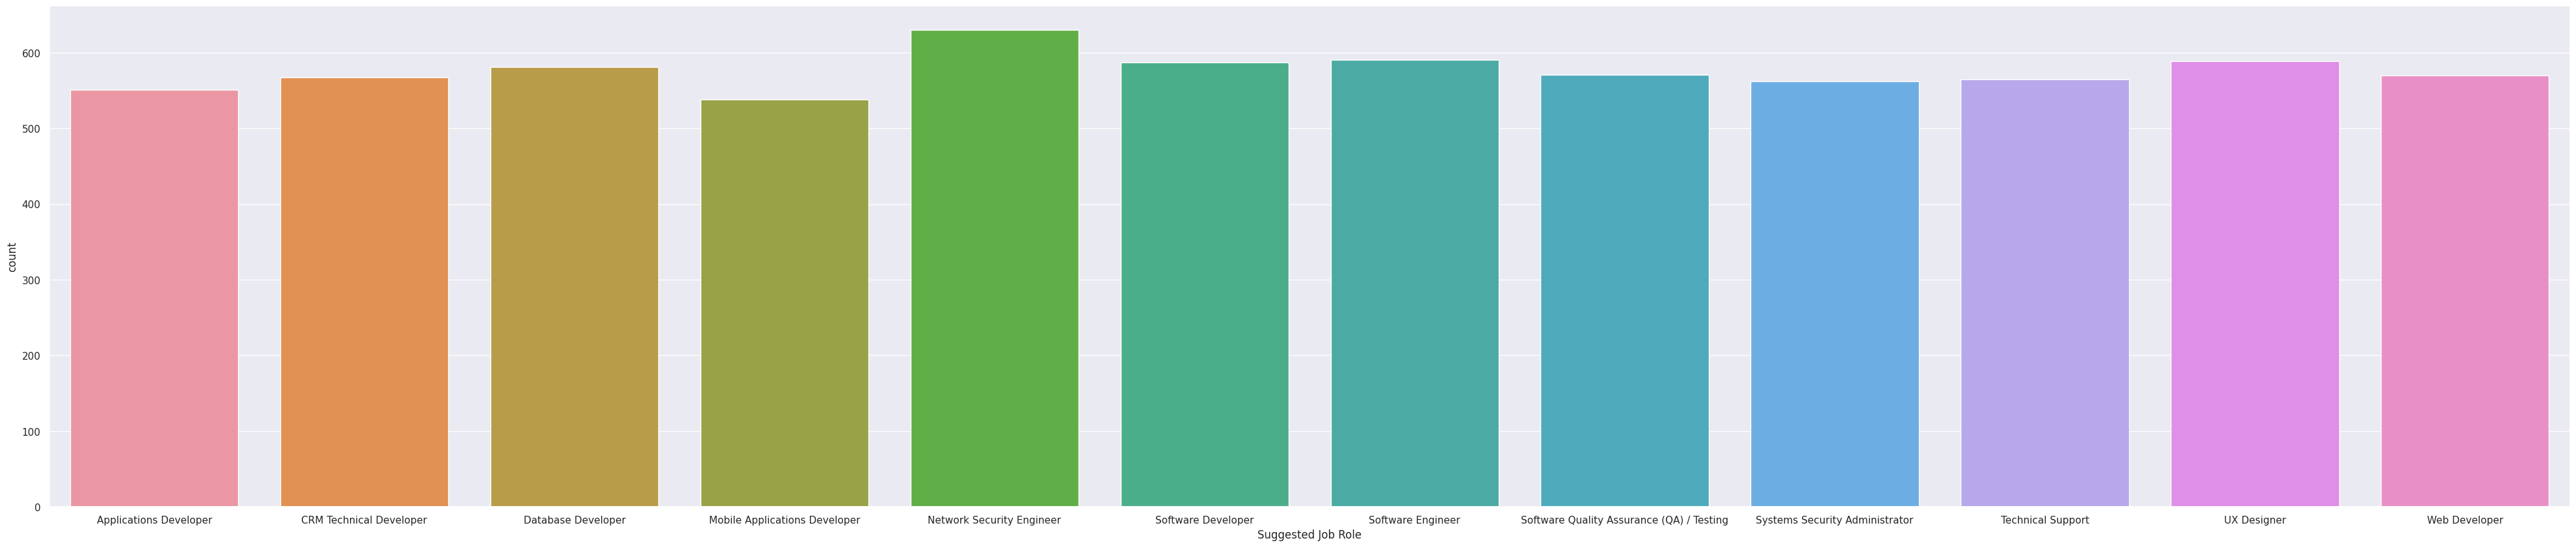

In [9]:
sns.set(rc={'figure.figsize':(50,10)})
sns.countplot(x = df["Suggested Job Role"])

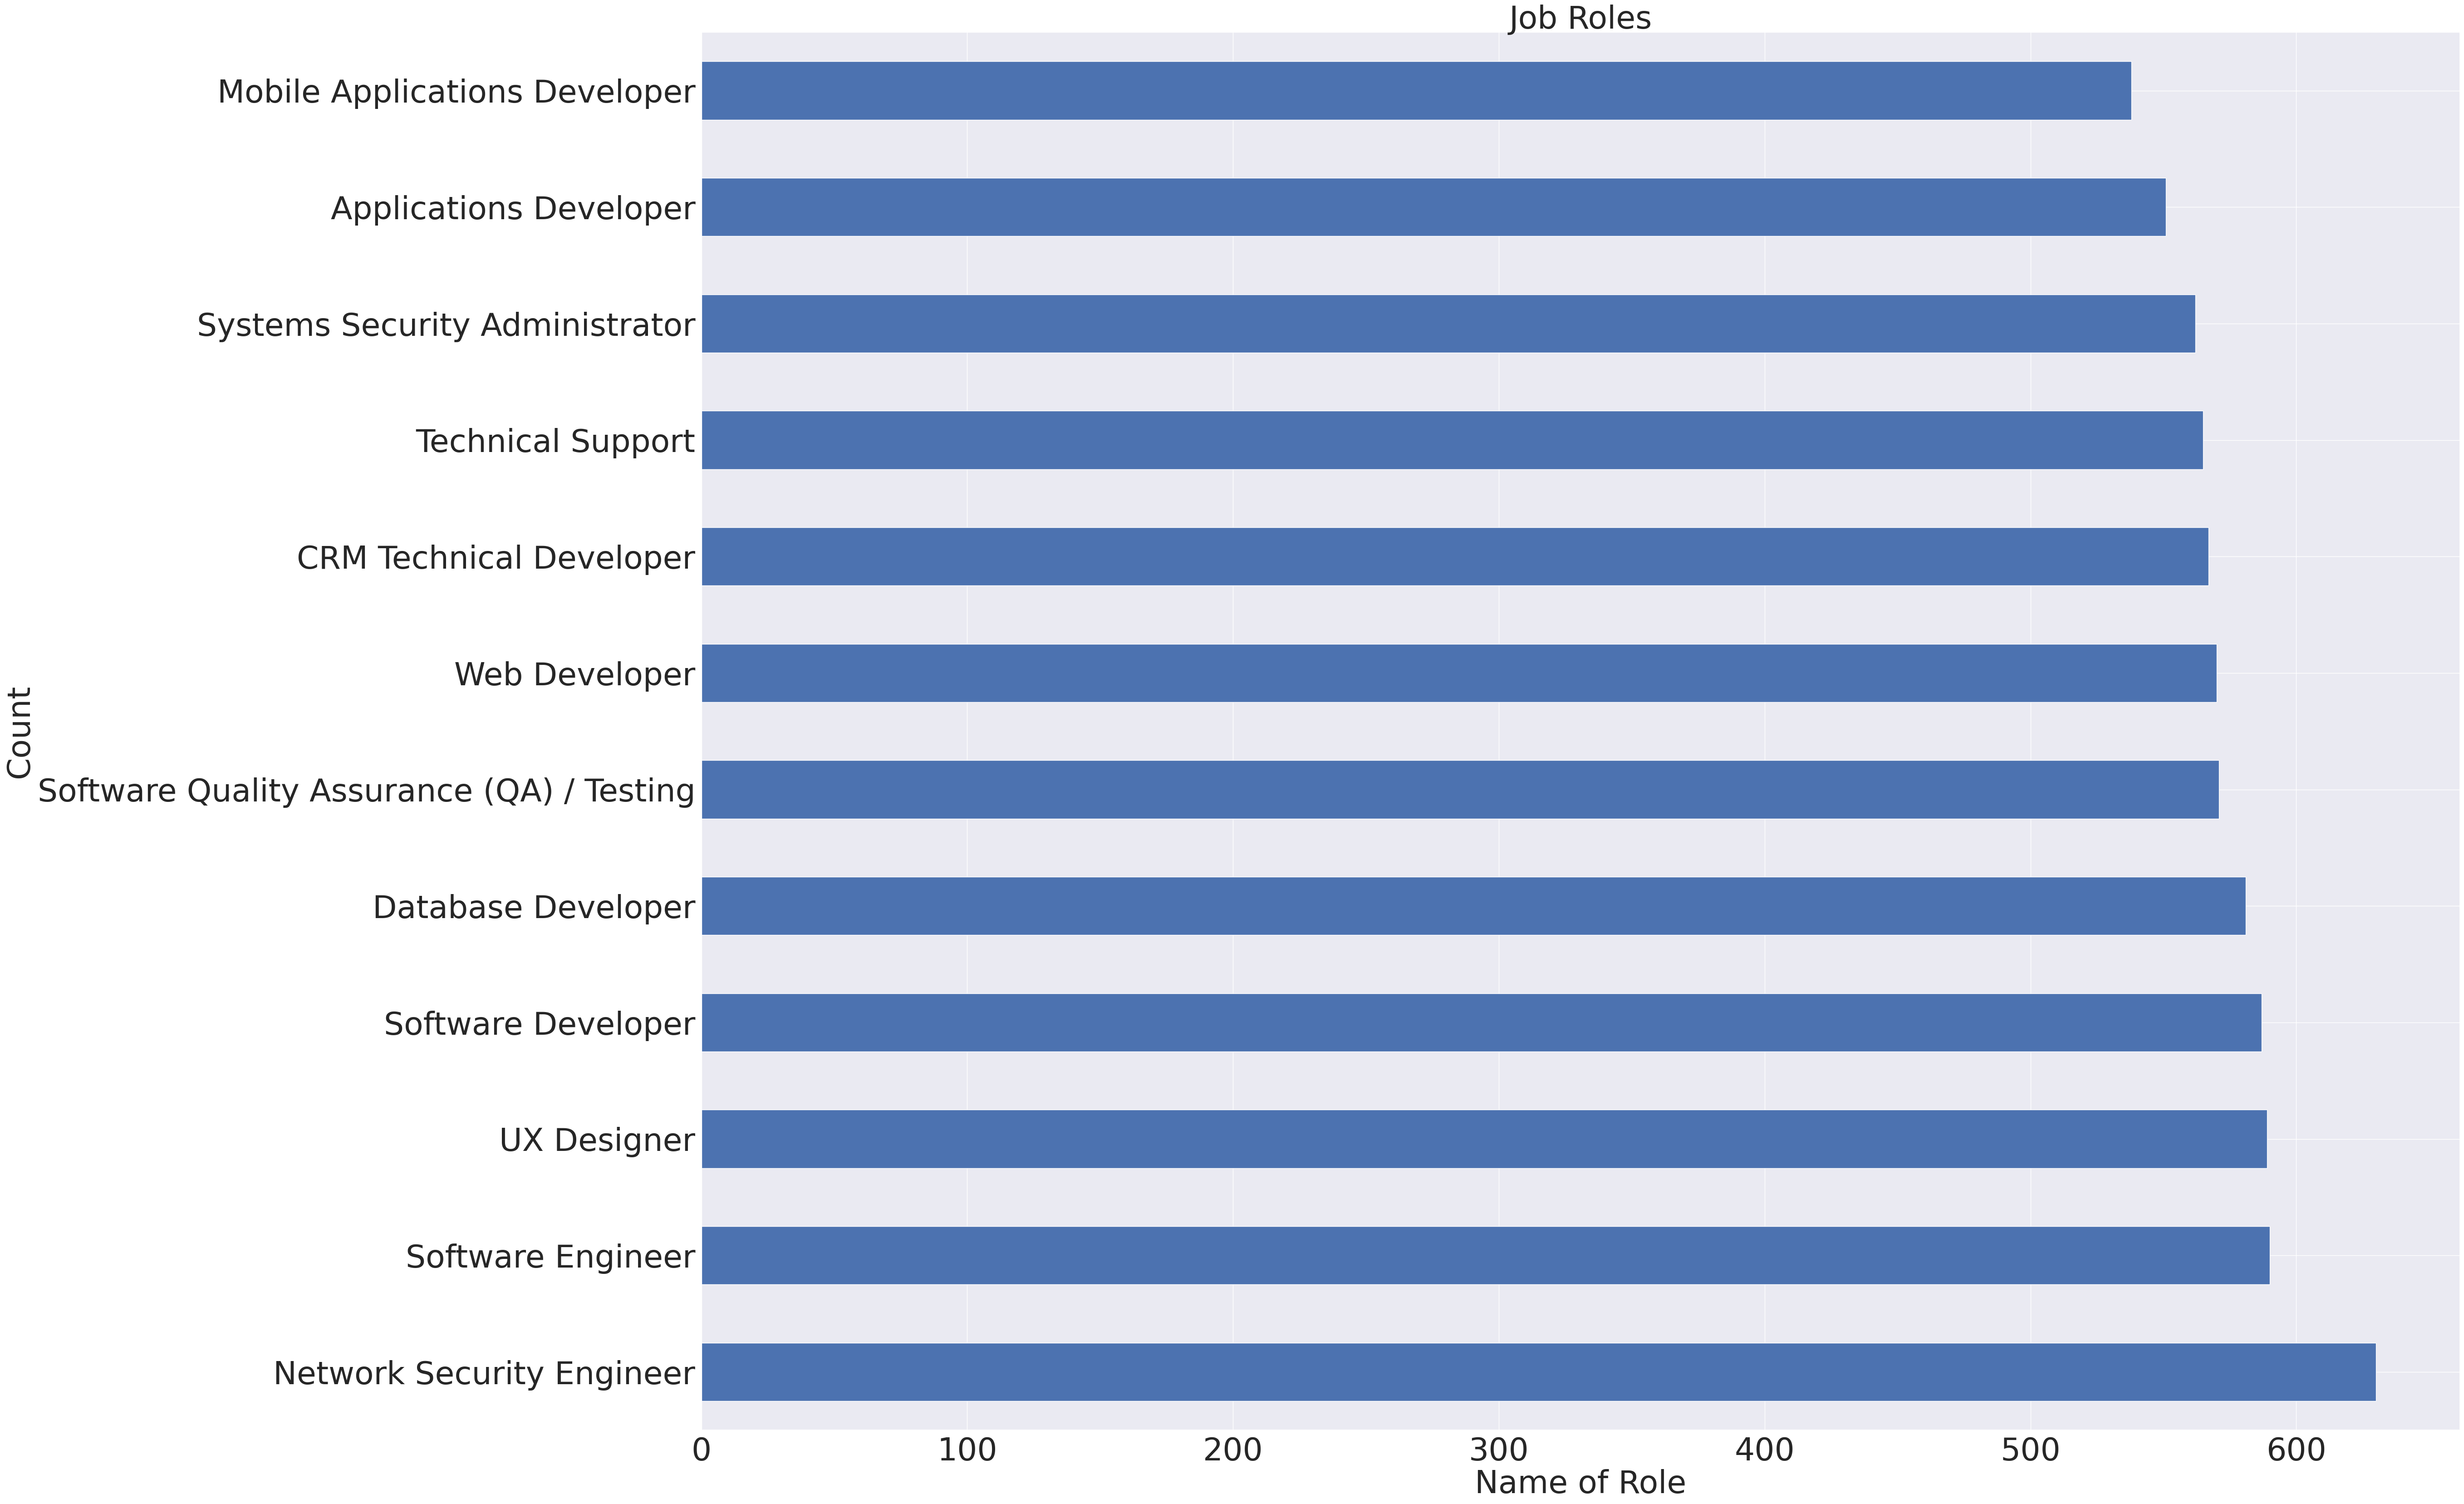

In [10]:
role.plot(kind='barh',figsize=(50,40),fontsize=50)
role.sort_values(inplace=True)
plt.title('Job Roles',fontsize=50)
plt.xlabel("Name of Role",fontsize=50)
plt.ylabel("Count",fontsize=50)
plt.style.use('ggplot')

<Axes: >

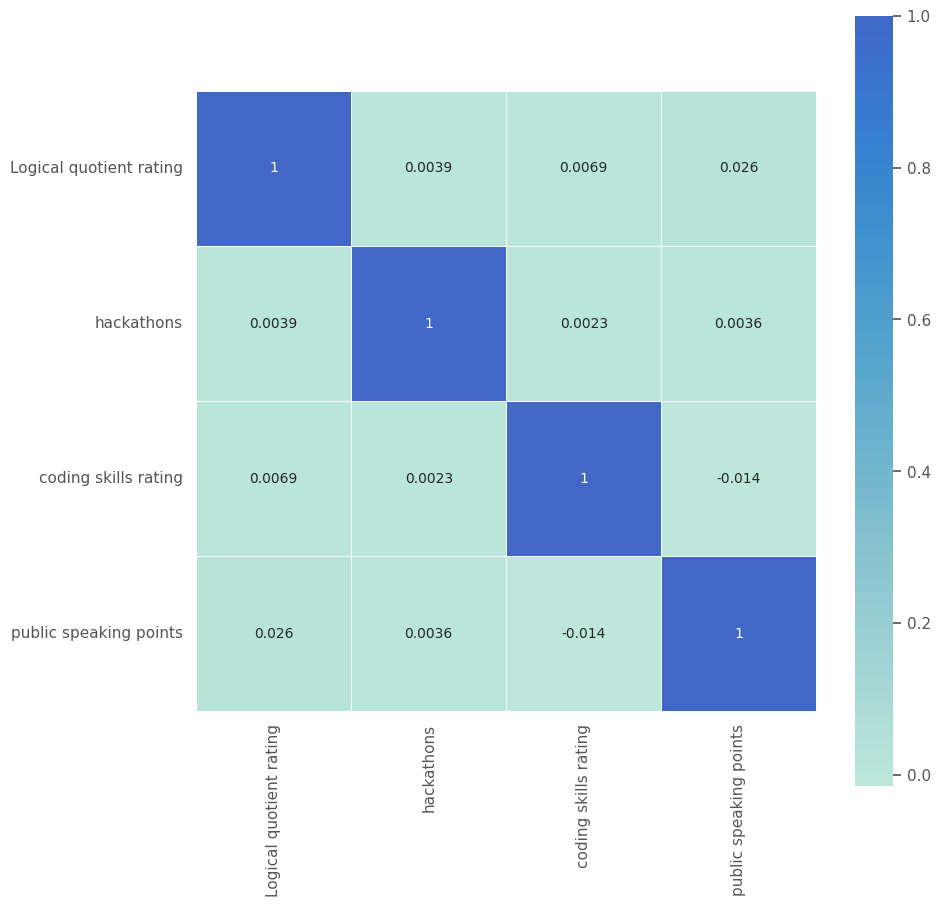

In [11]:
corr = df[['Logical quotient rating', 'hackathons', 
           'coding skills rating', 'public speaking points']].corr()
f,axes = plt.subplots(1,1,figsize = (10,10))
sns.heatmap(corr,square=True,annot = True,linewidth = .4,center = 2,ax = axes)

In [12]:
print(df["Interested subjects"].value_counts())

Interested subjects
Software Engineering     731
IOT                      722
cloud computing          721
programming              716
networks                 713
Computer Architecture    703
data engineering         672
hacking                  663
Management               644
parallel computing       616
Name: count, dtype: int64


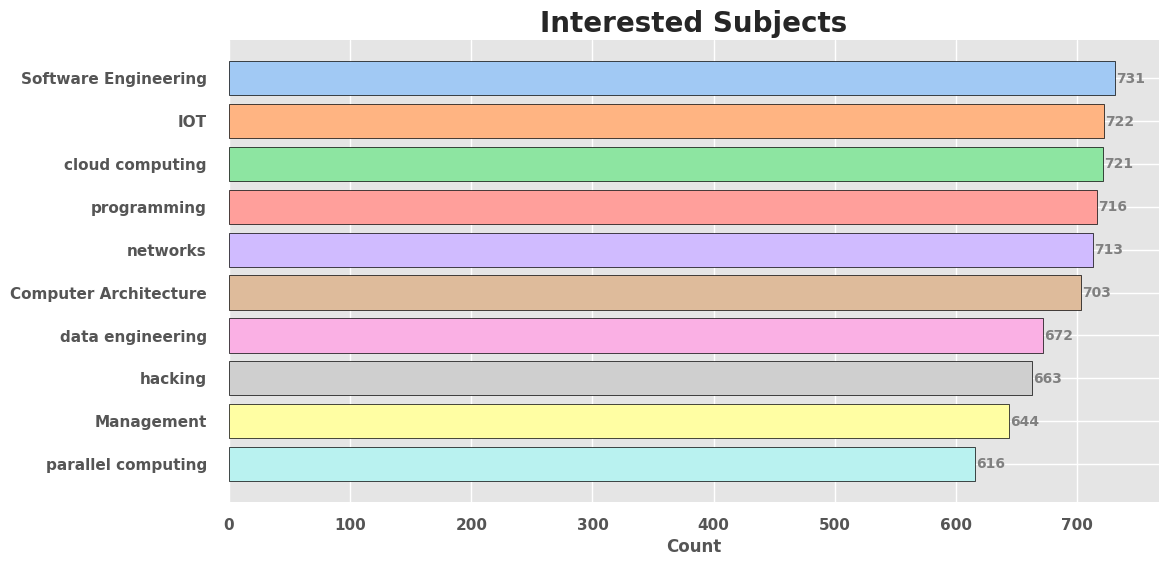

In [13]:
fig, ax = plt.subplots(figsize=(12,6))

# Horizontal Bar Plot
title_cnt=df["Interested subjects"].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('pastel',len(title_cnt)))

# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values 
ax.invert_yaxis()

ax.set_title('Interested Subjects',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')

plt.yticks(weight='bold')
plt.xticks(weight='bold')

plt.show()


In [14]:
print(df["Interested Type of Books"].value_counts())

Interested Type of Books
Guide                    405
Health                   401
Self help                377
Horror                   377
Biographies              219
Science fiction          218
Satire                   212
Childrens                212
Autobiographies          210
Prayer books             207
Fantasy                  205
Journals                 203
Trilogy                  203
Anthology                202
Encyclopedias            201
Drama                    201
Mystery                  200
History                  199
Science                  198
Dictionaries             198
Diaries                  197
Religion-Spirituality    197
Action and Adventure     193
Poetry                   193
Cookbooks                186
Comics                   186
Art                      186
Travel                   186
Series                   180
Math                     176
Romance                  173
Name: count, dtype: int64


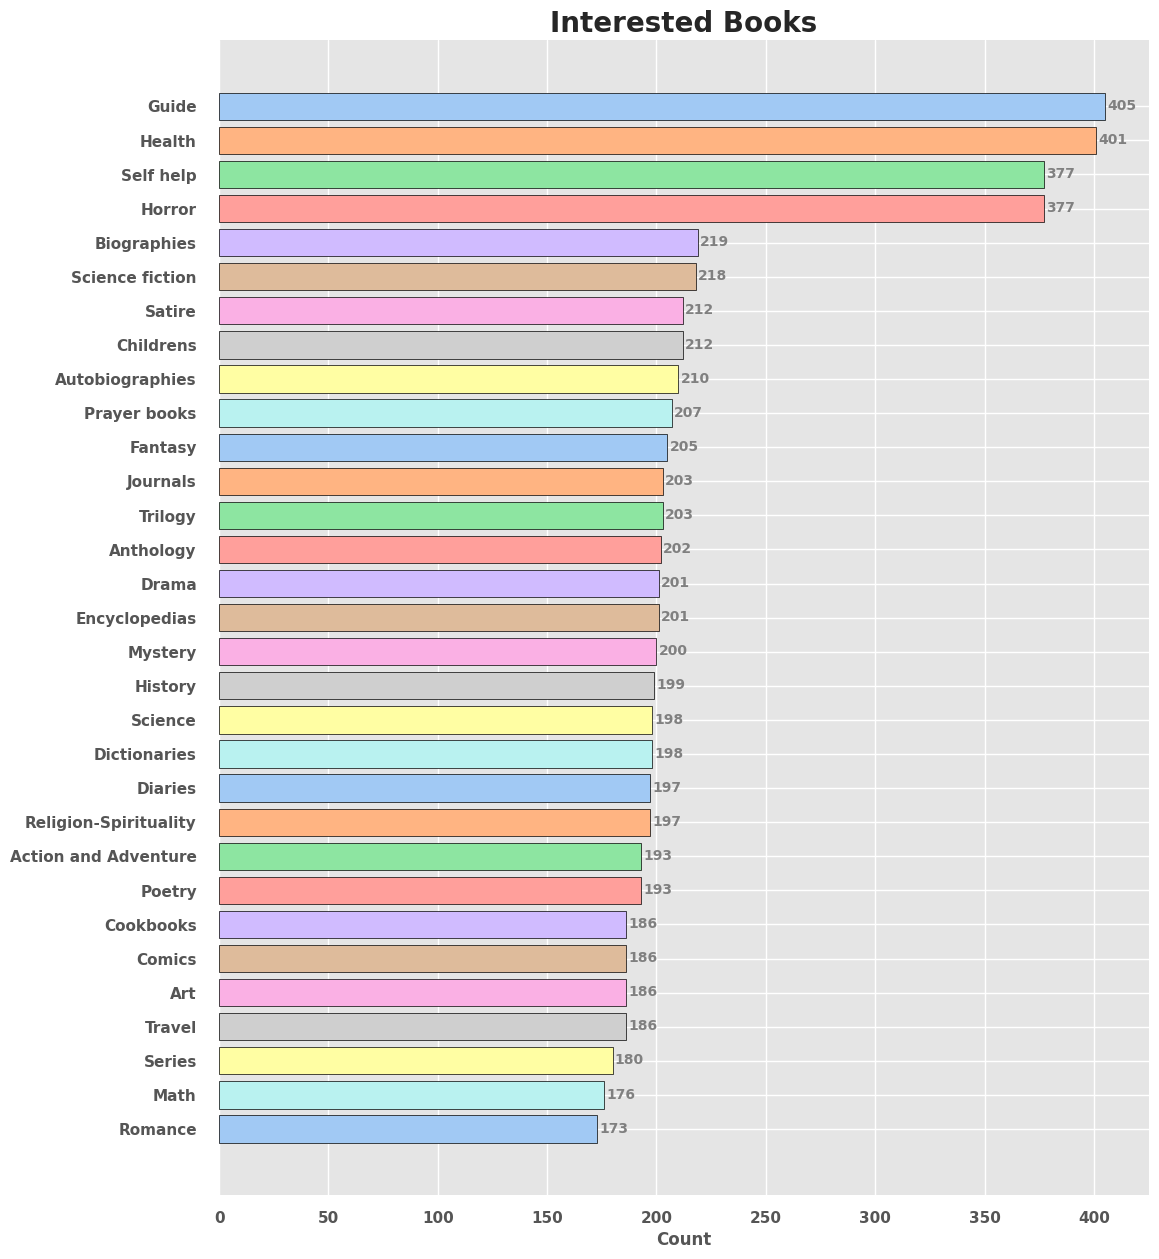

In [15]:
fig, ax = plt.subplots(figsize=(12,15))

# Horizontal Bar Plot
title_cnt=df["Interested Type of Books"].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('pastel',len(title_cnt)))



# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Interested Books',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()


In [16]:
print(df["certifications"].value_counts())

certifications
r programming           803
information security    785
shell programming       783
machine learning        783
full stack              768
hadoop                  764
python                  756
distro making           740
app development         719
Name: count, dtype: int64


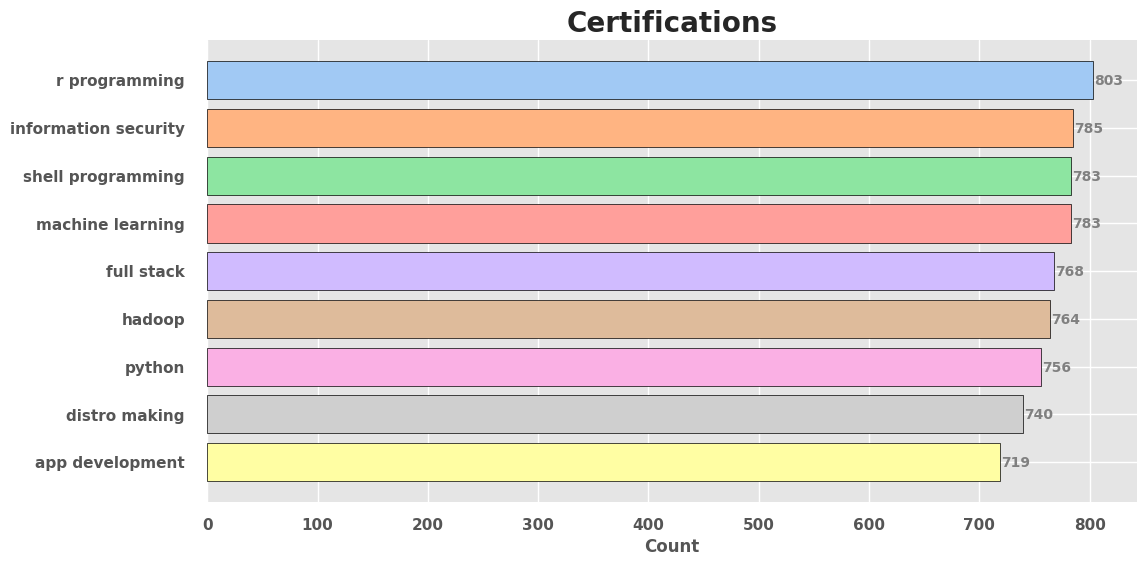

In [17]:
fig, ax = plt.subplots(figsize=(12,6))

# Horizontal Bar Plot
title_cnt=df.certifications.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('pastel',len(title_cnt)))



# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Certifications',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

In [18]:
print(df["workshops"].value_counts())

workshops
database security    897
system designing     891
web technologies     891
hacking              867
testing              852
data science         842
game development     831
cloud computing      830
Name: count, dtype: int64


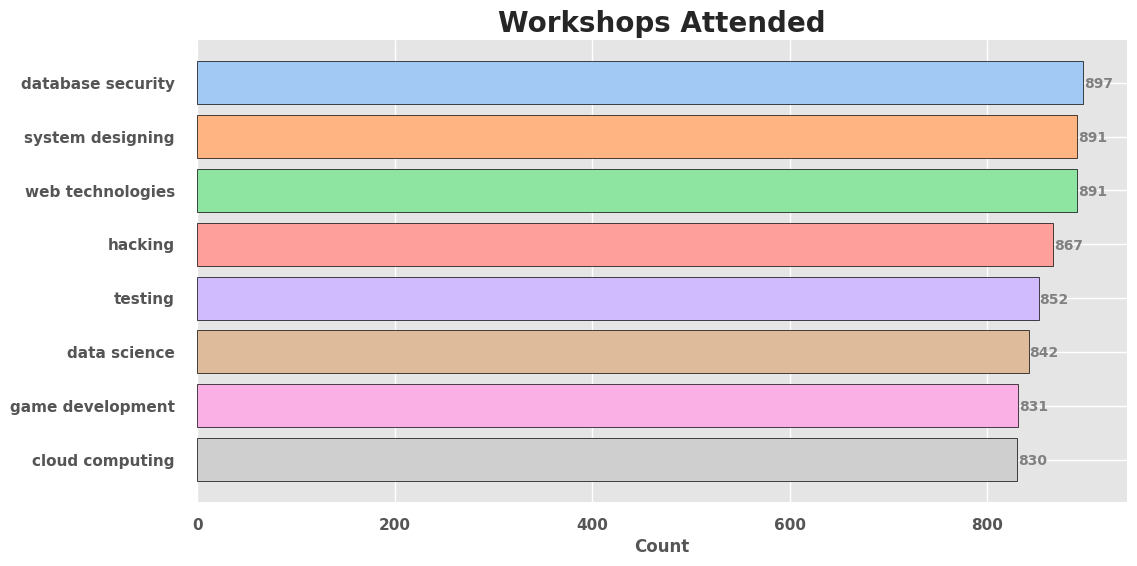

In [19]:
fig, ax = plt.subplots(figsize=(12,6))

# Horizontal Bar Plot
title_cnt=df.workshops.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('pastel',len(title_cnt)))



# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Workshops Attended',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

In [20]:
print(df["Type of company want to settle in?"].value_counts())

Type of company want to settle in?
Service Based                        725
Web Services                         719
BPA                                  711
Testing and Maintainance Services    698
Product based                        695
Finance                              694
Cloud Services                       692
product development                  669
Sales and Marketing                  658
SAaS services                        640
Name: count, dtype: int64


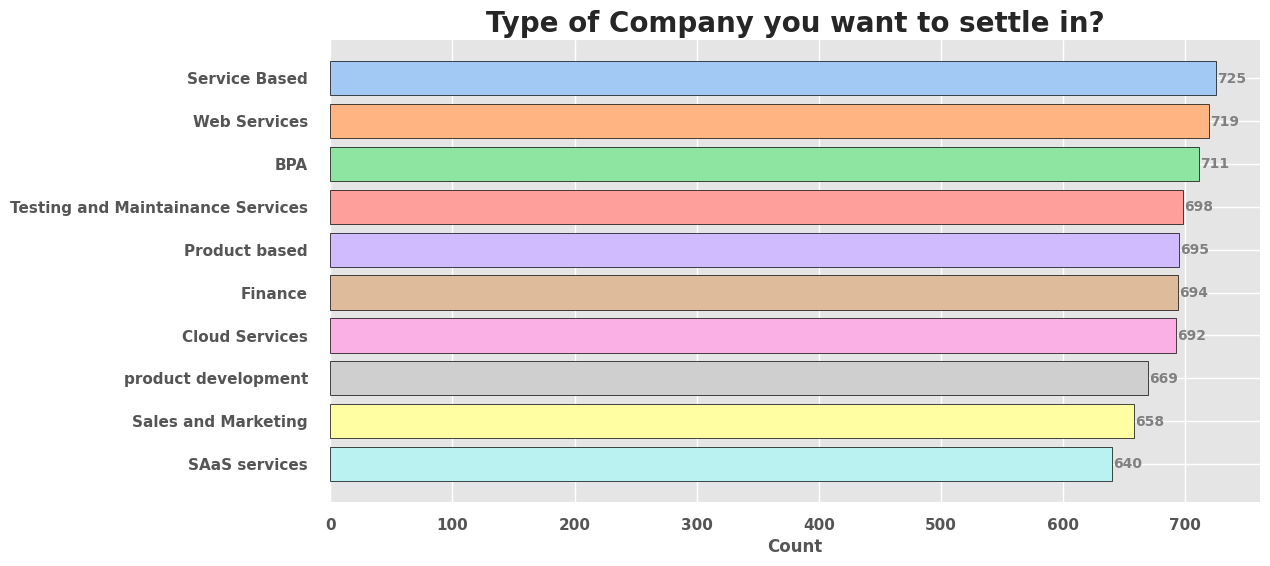

In [21]:
fig, ax = plt.subplots(figsize=(12,6))

# Horizontal Bar Plot
title_cnt=df["Type of company want to settle in?"].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('pastel',len(title_cnt)))



# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Type of Company you want to settle in?',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
    fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

In [22]:
print(df["interested career area "].value_counts())

interested career area 
system developer            1178
security                    1177
Business process analyst    1154
developer                   1145
testing                     1128
cloud computing             1119
Name: count, dtype: int64


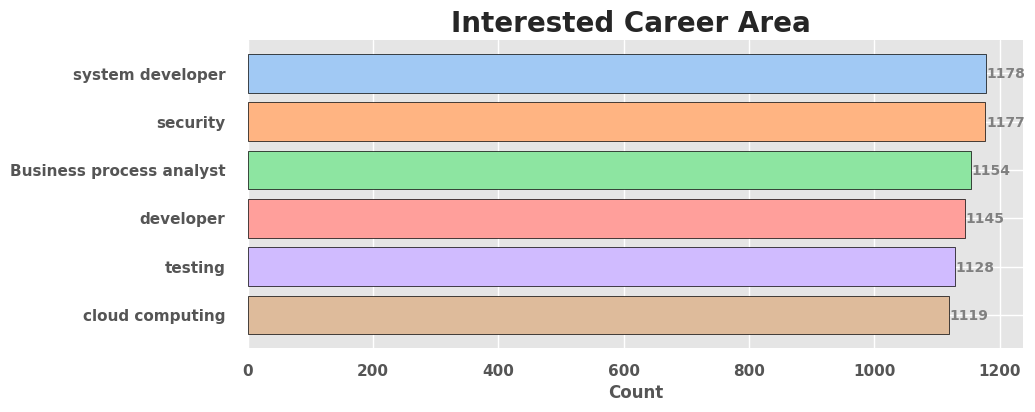

In [23]:
fig, ax = plt.subplots(figsize=(10,4)) #width,height

# Horizontal Bar Plot
title_cnt=df["interested career area "].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('pastel',len(title_cnt)))



# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Interested Career Area ',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

In [24]:
cols = df[['self-learning capability?', 'Extra-courses did','Taken inputs from seniors or elders','worked in teams ever?', 
                      'Introvert']]
for i in cols:
    cleanup_nums={i:{"yes":1, "no":0}}
    df = df.replace(cleanup_nums)

df   

/tmp/ipykernel_33/1638833986.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(cleanup_nums)


,Logical quotient rating,hackathons,coding skills rating,public speaking points,self-learning capability?,Extra-courses did,certifications,workshops,reading and writing skills,memory capability score,Interested subjects,interested career area,Type of company want to settle in?,Taken inputs from seniors or elders,Interested Type of Books,Management or Technical,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,5,0,6,2,1,0,information security,testing,poor,poor,programming,testing,BPA,0,Series,Management,smart worker,1,0,Applications Developer
1,7,6,4,3,0,1,shell programming,testing,excellent,medium,Management,system developer,Cloud Services,1,Autobiographies,Technical,hard worker,0,1,Applications Developer
2,2,3,9,1,0,1,information security,testing,excellent,poor,data engineering,Business process analyst,product development,1,Travel,Technical,smart worker,0,0,Applications Developer
3,2,6,3,5,0,1,r programming,database security,excellent,poor,networks,testing,Testing and Maintainance Services,1,Guide,Management,smart worker,1,1,Applications Developer
4,2,0,3,4,1,0,distro making,game development,excellent,medium,Software Engineering,system developer,BPA,0,Health,Technical,hard worker,1,0,Applications Developer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6896,7,5,6,2,1,0,shell programming,hacking,poor,poor,Software Engineering,testing,Testing and Maintainance Services,1,Trilogy,Management,smart worker,0,1,Web Developer
6897,6,5,1,8,0,0,machine learning,hacking,excellent,excellent,programming,testing,Testing and Maintainance Services,0,Science,Management,hard worker,0,0,Web Developer
6898,5,1,6,7,1,0,distro making,data science,poor,poor,IOT,system developer,Cloud Services,1,Self help,Technical,hard worker,1,0,Web Developer
6899,1,6,4,6,0,0,app development,game development,poor,excellent,data engineering,developer,SAaS services,0,Drama,Technical,smart worker,0,1,Web Developer


In [25]:
print("List of Categorical Features: ",df.select_dtypes(include=['object']).columns.tolist())

List of Categorical Features:  ['certifications', 'workshops', 'reading and writing skills', 'memory capability score', 'Interested subjects', 'interested career area ', 'Type of company want to settle in?', 'Interested Type of Books', 'Management or Technical', 'hard/smart worker', 'Suggested Job Role']


In [26]:
col1=df[["reading and writing skills","memory capability score"]]
for i in col1:
    cleanup_nums={i:{"poor":0,"medium":1,"excellent": 2}}
    df = df.replace(cleanup_nums)

df

/tmp/ipykernel_33/4195283302.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(cleanup_nums)


,Logical quotient rating,hackathons,coding skills rating,public speaking points,self-learning capability?,Extra-courses did,certifications,workshops,reading and writing skills,memory capability score,Interested subjects,interested career area,Type of company want to settle in?,Taken inputs from seniors or elders,Interested Type of Books,Management or Technical,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,5,0,6,2,1,0,information security,testing,0,0,programming,testing,BPA,0,Series,Management,smart worker,1,0,Applications Developer
1,7,6,4,3,0,1,shell programming,testing,2,1,Management,system developer,Cloud Services,1,Autobiographies,Technical,hard worker,0,1,Applications Developer
2,2,3,9,1,0,1,information security,testing,2,0,data engineering,Business process analyst,product development,1,Travel,Technical,smart worker,0,0,Applications Developer
3,2,6,3,5,0,1,r programming,database security,2,0,networks,testing,Testing and Maintainance Services,1,Guide,Management,smart worker,1,1,Applications Developer
4,2,0,3,4,1,0,distro making,game development,2,1,Software Engineering,system developer,BPA,0,Health,Technical,hard worker,1,0,Applications Developer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6896,7,5,6,2,1,0,shell programming,hacking,0,0,Software Engineering,testing,Testing and Maintainance Services,1,Trilogy,Management,smart worker,0,1,Web Developer
6897,6,5,1,8,0,0,machine learning,hacking,2,2,programming,testing,Testing and Maintainance Services,0,Science,Management,hard worker,0,0,Web Developer
6898,5,1,6,7,1,0,distro making,data science,0,0,IOT,system developer,Cloud Services,1,Self help,Technical,hard worker,1,0,Web Developer
6899,1,6,4,6,0,0,app development,game development,0,2,data engineering,developer,SAaS services,0,Drama,Technical,smart worker,0,1,Web Developer


In [27]:
category_cols = df[['certifications', 'workshops', 'Interested subjects', 'interested career area ', 'Type of company want to settle in?', 
                    'Interested Type of Books']]
for i in category_cols:
    df[i] = df[i].astype('category')
    df[i + "_code"] = df[i].cat.codes

df

,Logical quotient rating,hackathons,coding skills rating,public speaking points,self-learning capability?,Extra-courses did,certifications,workshops,reading and writing skills,memory capability score,...,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role,certifications_code,workshops_code,Interested subjects_code,interested career area _code,Type of company want to settle in?_code,Interested Type of Books_code
0,5,0,6,2,1,0,information security,testing,0,0,...,smart worker,1,0,Applications Developer,4,6,9,5,0,28
1,7,6,4,3,0,1,shell programming,testing,2,1,...,hard worker,0,1,Applications Developer,8,6,2,4,1,3
2,2,3,9,1,0,1,information security,testing,2,0,...,smart worker,0,0,Applications Developer,4,6,5,0,9,29
3,2,6,3,5,0,1,r programming,database security,2,0,...,smart worker,1,1,Applications Developer,7,2,7,5,7,13
4,2,0,3,4,1,0,distro making,game development,2,1,...,hard worker,1,0,Applications Developer,1,3,3,4,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6896,7,5,6,2,1,0,shell programming,hacking,0,0,...,smart worker,0,1,Web Developer,8,4,3,5,7,30
6897,6,5,1,8,0,0,machine learning,hacking,2,2,...,hard worker,0,0,Web Developer,5,4,9,5,7,25
6898,5,1,6,7,1,0,distro making,data science,0,0,...,hard worker,1,0,Web Developer,1,1,1,4,1,27
6899,1,6,4,6,0,0,app development,game development,0,2,...,smart worker,0,1,Web Developer,0,3,5,2,4,10


In [28]:
print("List of Categorical Features: ", df.select_dtypes(include=['object']).columns.tolist())

List of Categorical Features:  ['Management or Technical', 'hard/smart worker', 'Suggested Job Role']


In [29]:
print(df['Management or Technical'].unique())
print(df['hard/smart worker'].unique())

['Management' 'Technical']
['smart worker' 'hard worker']


In [30]:
df = pd.get_dummies(df, columns = ['Management or Technical','hard/smart worker'], prefix = ['A','B'])
df

,Logical quotient rating,hackathons,coding skills rating,public speaking points,self-learning capability?,Extra-courses did,certifications,workshops,reading and writing skills,memory capability score,...,certifications_code,workshops_code,Interested subjects_code,interested career area _code,Type of company want to settle in?_code,Interested Type of Books_code,A_Management,A_Technical,B_hard worker,B_smart worker
0,5,0,6,2,1,0,information security,testing,0,0,...,4,6,9,5,0,28,True,False,False,True
1,7,6,4,3,0,1,shell programming,testing,2,1,...,8,6,2,4,1,3,False,True,True,False
2,2,3,9,1,0,1,information security,testing,2,0,...,4,6,5,0,9,29,False,True,False,True
3,2,6,3,5,0,1,r programming,database security,2,0,...,7,2,7,5,7,13,True,False,False,True
4,2,0,3,4,1,0,distro making,game development,2,1,...,1,3,3,4,0,14,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6896,7,5,6,2,1,0,shell programming,hacking,0,0,...,8,4,3,5,7,30,True,False,False,True
6897,6,5,1,8,0,0,machine learning,hacking,2,2,...,5,4,9,5,7,25,True,False,True,False
6898,5,1,6,7,1,0,distro making,data science,0,0,...,1,1,1,4,1,27,False,True,True,False
6899,1,6,4,6,0,0,app development,game development,0,2,...,0,3,5,2,4,10,False,True,False,True


In [31]:
print("List of Numerical Features: ", df.select_dtypes(include=np.number).columns.tolist())

List of Numerical Features:  ['Logical quotient rating', 'hackathons', 'coding skills rating', 'public speaking points', 'self-learning capability?', 'Extra-courses did', 'reading and writing skills', 'memory capability score', 'Taken inputs from seniors or elders', 'worked in teams ever?', 'Introvert', 'certifications_code', 'workshops_code', 'Interested subjects_code', 'interested career area _code', 'Type of company want to settle in?_code', 'Interested Type of Books_code']


In [32]:
feed = df[['Logical quotient rating', 'hackathons', 'coding skills rating', 'public speaking points', 
                     'self-learning capability?', 'Extra-courses did', 'reading and writing skills', 'memory capability score', 
                     'Taken inputs from seniors or elders', 'worked in teams ever?', 'Introvert', 'certifications_code', 
                     'workshops_code', 'Interested subjects_code', 'interested career area _code', 
                     'Type of company want to settle in?_code', 'Interested Type of Books_code', 'A_Management', 'A_Technical', 
                     'B_hard worker', 'B_smart worker','Suggested Job Role']]

train = feed.drop('Suggested Job Role', axis=1)
test = feed['Suggested Job Role']

X_train, X_test, y_train, y_test = train_test_split(train, test, test_size = 0.2, random_state = 42)

In [33]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=1)

dtree = dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy
print("accuracy=",accuracy*10)

accuracy= 0.9051412020275162


In [34]:
userdata = [['7','6','6','8','3','5','4', '4', '7', '3', '3', '6','8', 
                    '7','5','7','4','5','6','8','8']]
ynewclass = dtree.predict(userdata)
ynew = dtree.predict_proba(userdata)
print(ynewclass)
print("Probabilities of all classes: ", ynew)
print("Probability of Predicted class : ", np.max(ynew))

['Technical Support']
Probabilities of all classes:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
Probability of Predicted class :  1.0


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 10)
rf.fit(X_train, y_train)
rfc_y_pred = rf.predict(X_test)
rfc_cm = confusion_matrix(y_test,rfc_y_pred)
rfc_accuracy = accuracy_score(y_test,rfc_y_pred)
print("confusion matrics=",rfc_cm)
print("  ")
print("accuracy=",rfc_accuracy*10)

confusion matrics= [[10 11 16 11 13 10 10 14 11  7 10  9]
 [12  9  8  7 10  6  9 11  4 13  9  7]
 [ 5 13 14 14 14  6 13  7  7 10 11  9]
 [14 11  6  4 16  4  3  8  5 12  7 10]
 [11 10  6  3 16 16 10  6  9  9 13 12]
 [ 8 10  7  4 11 14  5 13 10 11 10 10]
 [ 6  6 18  8 16 10  9 13  7 10  9  4]
 [10 10 12  8 13  9 15  9  7  4 11 10]
 [ 8  7 13  9 20 12  9  5  3 14  8  6]
 [ 9 13 13  6 15  9 13  4  3  8 10  8]
 [ 7 11 14  5 19 15  9  8  8  8  8  7]
 [ 7 10 10  9 11 14  6 14  6  6  9  7]]
  
accuracy= 0.8037653874004345


In [36]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("accuracy=",accuracy*10)

accuracy= 0.9485879797248371


In [37]:
cm = confusion_matrix(y_test,rfc_y_pred)
print("confusion matrics=",cm)

confusion matrics= [[10 11 16 11 13 10 10 14 11  7 10  9]
 [12  9  8  7 10  6  9 11  4 13  9  7]
 [ 5 13 14 14 14  6 13  7  7 10 11  9]
 [14 11  6  4 16  4  3  8  5 12  7 10]
 [11 10  6  3 16 16 10  6  9  9 13 12]
 [ 8 10  7  4 11 14  5 13 10 11 10 10]
 [ 6  6 18  8 16 10  9 13  7 10  9  4]
 [10 10 12  8 13  9 15  9  7  4 11 10]
 [ 8  7 13  9 20 12  9  5  3 14  8  6]
 [ 9 13 13  6 15  9 13  4  3  8 10  8]
 [ 7 11 14  5 19 15  9  8  8  8  8  7]
 [ 7 10 10  9 11 14  6 14  6  6  9  7]]


In [40]:
import pickle 
pickle.dump(dtree,open('weights.pkl','wb'))

In [41]:
pickle.dump(knn, open('knnweights.pkl','wb'))